<a href="https://colab.research.google.com/github/JonathaVaz/Project_Dados_de_Crioterapia_para_Analise_das_Melhores_Infos/blob/main/Crioterapia_Dados_Analise_Selecao_Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Coleta de Dados de Crioterapia para Analise e Seleção das Melhores Informações para criação da Visualização e Modelos.
# Jonatha Rodrigues T. Vaz
# 24/04/2023

In [2]:
# Import das Bibliotecas 

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
# Carregando os Dados no Objeto Pandas

data = pd.read_csv("dados_cryotherapy.csv")

In [4]:
# Exibindo as 20 primeiras linhas

data.head(20)

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0
5,1,41,8,2,2,20,1
6,1,36,11,2,1,8,0
7,1,59,3,3,3,20,0
8,1,20,4,12,1,6,1
9,2,34,11,3,3,150,0


In [5]:
# Exibindo as 20 ultimas linhas

data.tail(20)

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
70,2,21,10,7,1,35,0
71,1,15,10,11,1,30,1
72,1,15,2,11,1,4,1
73,2,15,2,10,3,70,1
74,1,17,9,12,1,10,0
75,1,17,5,10,1,63,1
76,1,23,10,7,3,72,0
77,1,27,10,7,1,6,0
78,1,15,5,5,1,6,1
79,1,18,4,1,1,80,1


In [6]:
# Separando os Dados em Features de Seleção e de Classificação

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features

In [14]:
# Selecionando as 7 Melhores Colunas 
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [15]:
# Exibindo o resultado da Classificação
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(7,'Score'))  #print 10 best features

                  Specs       Score
5                  Area  641.983877
1                 Idade  163.658904
2                 Tempo   57.822806
6  Resultado_Tratamento   42.000000
4                  Tipo   10.088235
3       Numero_Verrugas    1.258965
0                  Sexo    0.112916


In [16]:
# Import das Bibliotecas de Ciencias de Dados

import pandas as pd
import numpy as np

# Carregando os Dados da planilha para do DATAFrame chamdo data

data = pd.read_csv("dados_cryotherapy.csv")

# Selecionado / separando as features de seleção x features de classificação

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

# Importando Bibliotecas de Gráfico para Visualizar as melhores Features

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.00430894 0.06343437 0.130469   0.01122988 0.09270785 0.02476534
 0.67308462]


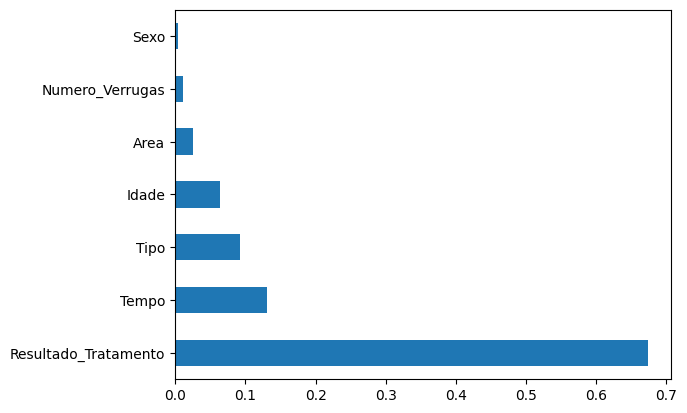

In [19]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

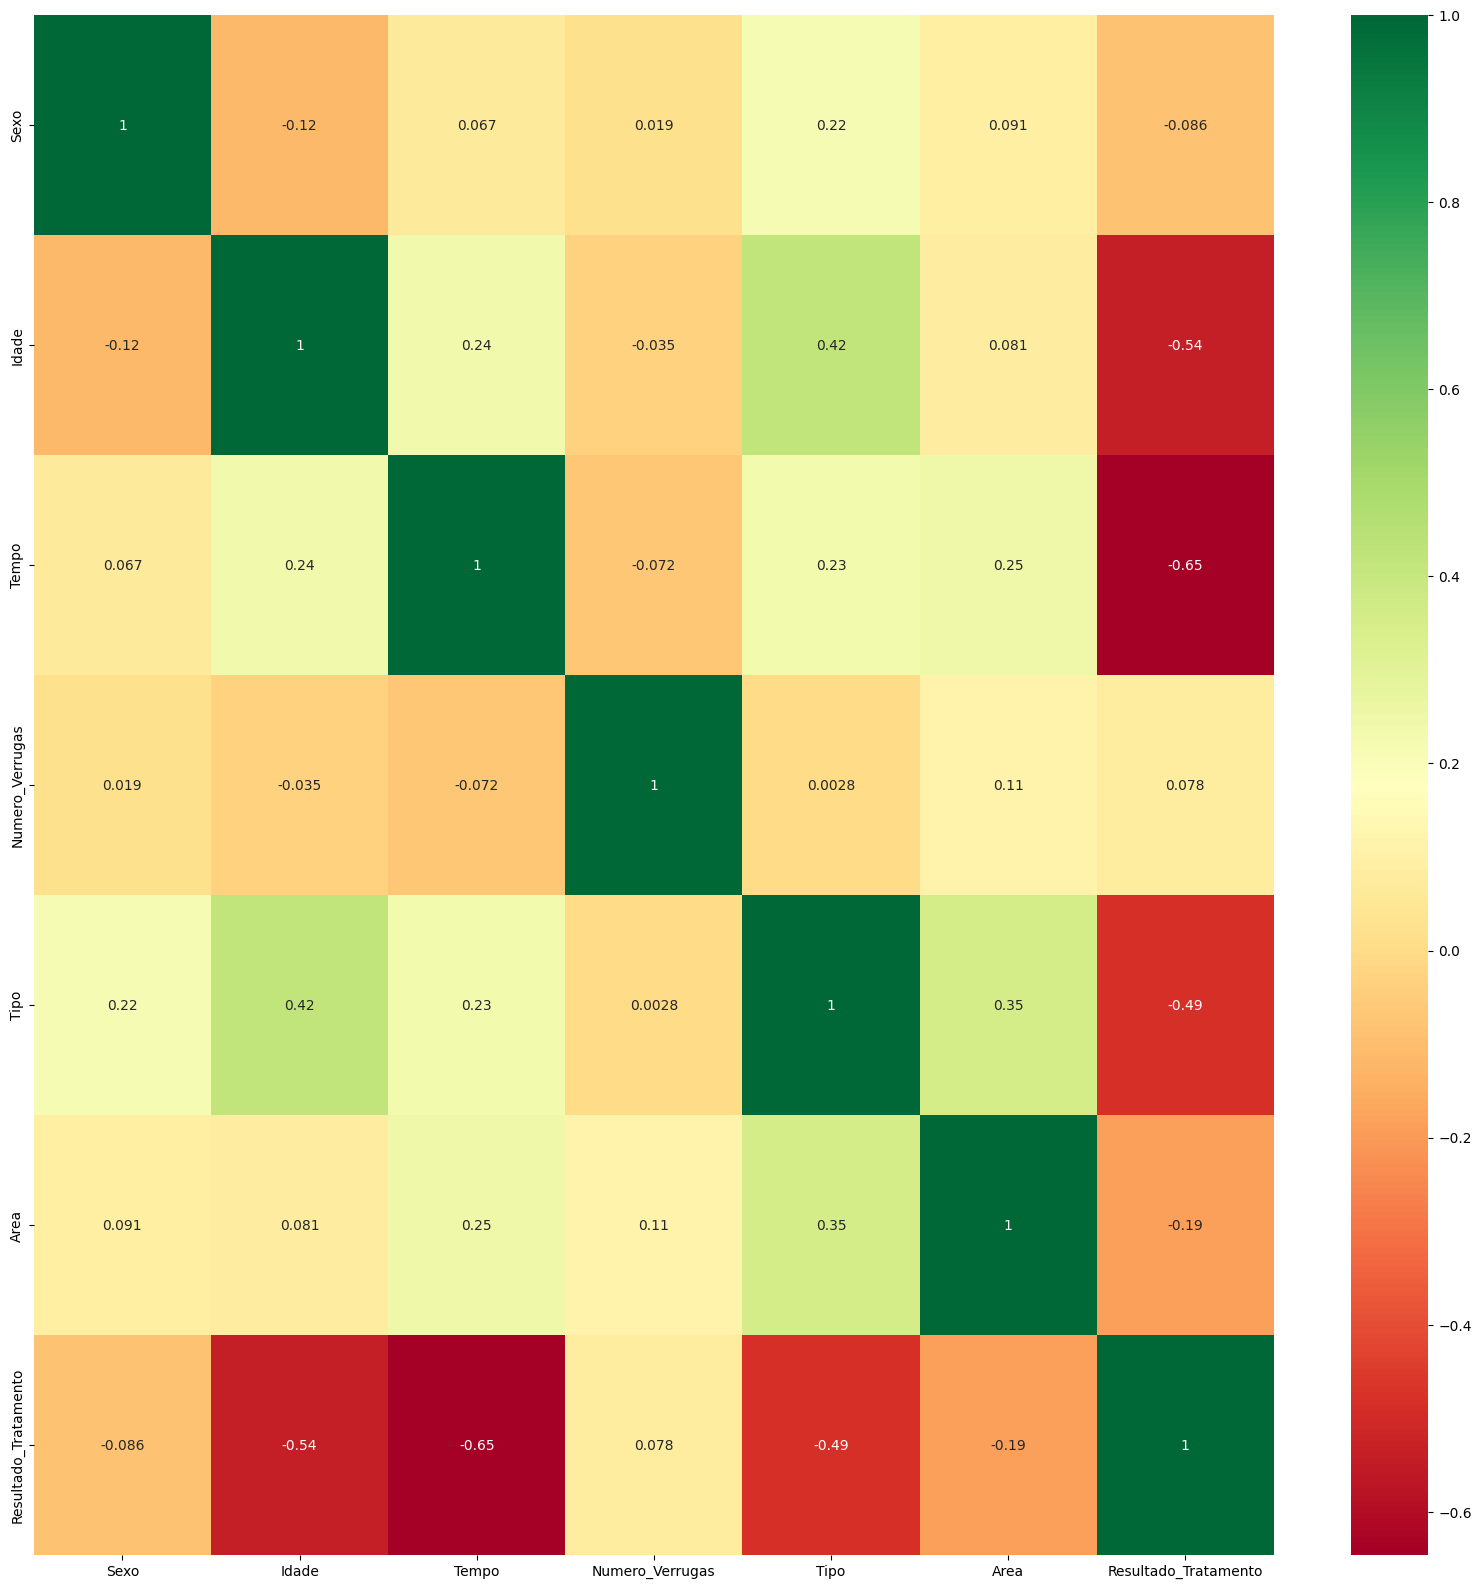

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

#import matplotlib as plt para visualizar

import matplotlib.pyplot as plt

data = pd.read_csv("dados_cryotherapy.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [51]:
# Criando os campos Descritivos (Labels)

labels = ["Idade","Tempo","Resultado_Tratamento","Tipo"]

In [52]:
# Criando os valores dos campos (Metricas do Grafico)
valores = [9, 25, 78, 16]

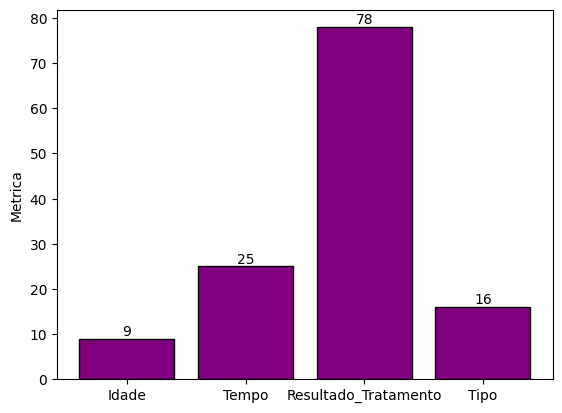

In [53]:
# Visualizando o Grafico com o objeto plt (Matplotlib)
plt.bar(labels,valores,color='purple', edgecolor='black')
plt.xlabel('')
plt.ylabel('Metrica')

for x,y in zip(labels,valores):
  plt.text(x, y+0.05, '%d' % y, ha='center' , va= 'bottom')